 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [33]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [81]:
# Reading whale returns
whale_returns_csv = Path ("../pandas-homework/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv , index_col = "Date" , parse_dates = True , infer_datetime_format = True)
whale_returns.sort_index(ascending = True , inplace = True)
whale_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [82]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [83]:
# Drop nulls
whale_returns.dropna(inplace = True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [84]:
# Reading algorithmic returns
algo_returns_csv = Path("../pandas-homework/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv , index_col = "Date" , parse_dates = True , infer_datetime_format = True)
algo_returns.sort_index(ascending = True , inplace = True)
algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [85]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [86]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [87]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [88]:
# Reading S&P TSX 60 Closing Prices
sp_tsx60_history_csv = Path("../pandas-homework/Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx60_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history.sort_index(ascending = True, inplace = True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [89]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [90]:
# Fix Data Types
sp_tsx_history["Close"]= sp_tsx_history["Close"].str.replace('$','')

In [91]:
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(',','').astype("float")
sp_tsx_history.sort_index(inplace = True)
sp_tsx_history

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [92]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [93]:
# Drop nulls
sp_tsx_returns.dropna(inplace = True)
sp_tsx_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [94]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.rename(columns = {"Close":"S&P TSX 60"}, inplace = True)
sp_tsx_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [95]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns,sp_tsx_returns], axis = "columns",join = "inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

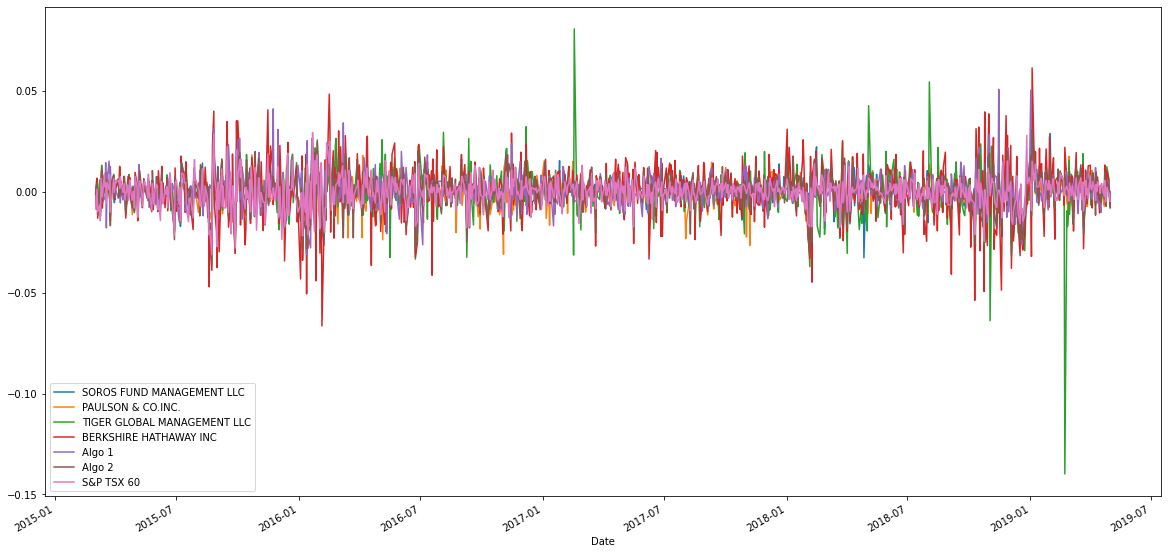

In [96]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

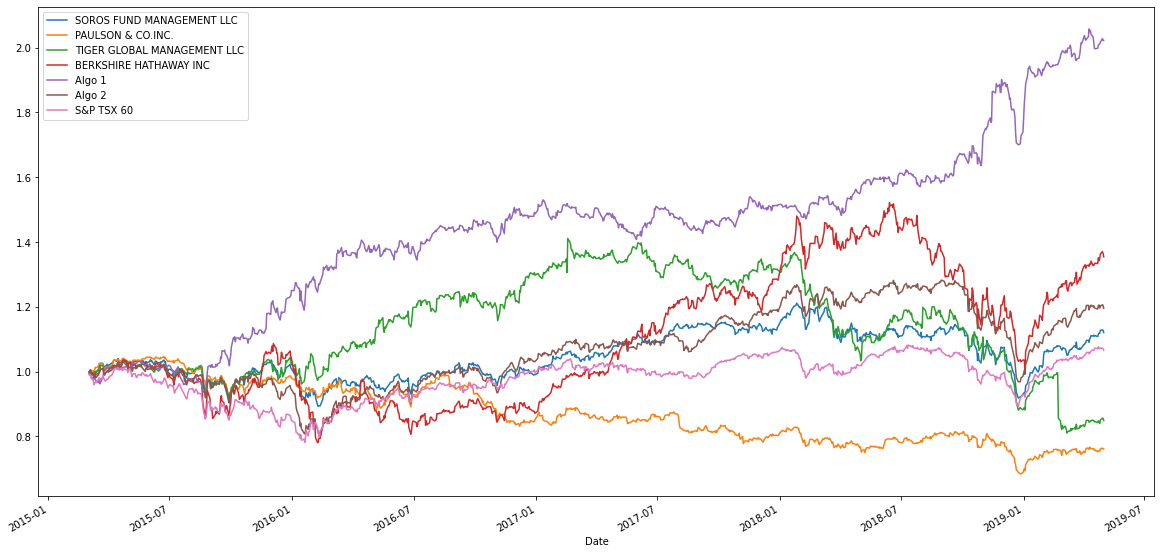

In [97]:
# Calculate cumulative returns of all portfolios
cumulative_return = (1 + combined_returns).cumprod()

# Plot cumulative returns
cumulative_return.plot(figsize = (20,10))

Algo 1 has the highest returns as shown above.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


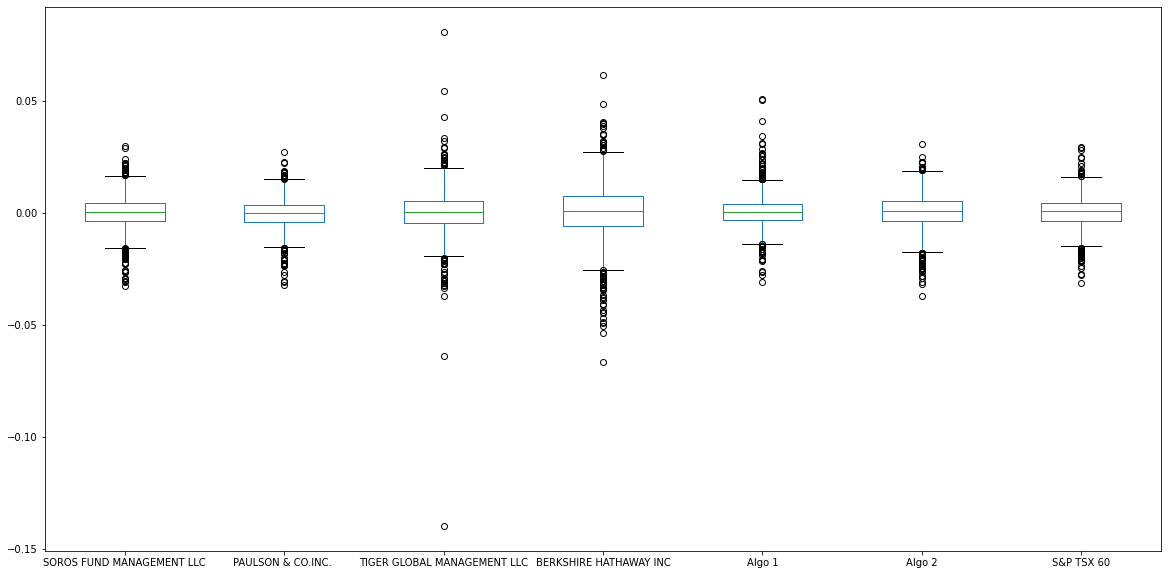

In [98]:
# Box plot to visually show risk
combined_returns.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [99]:
# Calculate the daily standard deviations of all portfolios
# Calculate  the daily standard deviation of S&P TSX 60
combined_std = pd.DataFrame(combined_returns.std()).rename(columns = {0:"std"}) 
combined_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P TSX 60,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [100]:
# Determine which portfolios are riskier than the S&P TSX 60
higher_std = combined_std[combined_std["std"] > combined_std.loc["S&P TSX 60", "std"]]
higher_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


Soros Fund , Tiger Global, Berkshire Hathaway, Algo 1 & Algo 2 have higher volatility than S&P TSX 60

### Calculate the Annualized Standard Deviation

In [101]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std*np.sqrt(252)
annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
S&P TSX 60,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

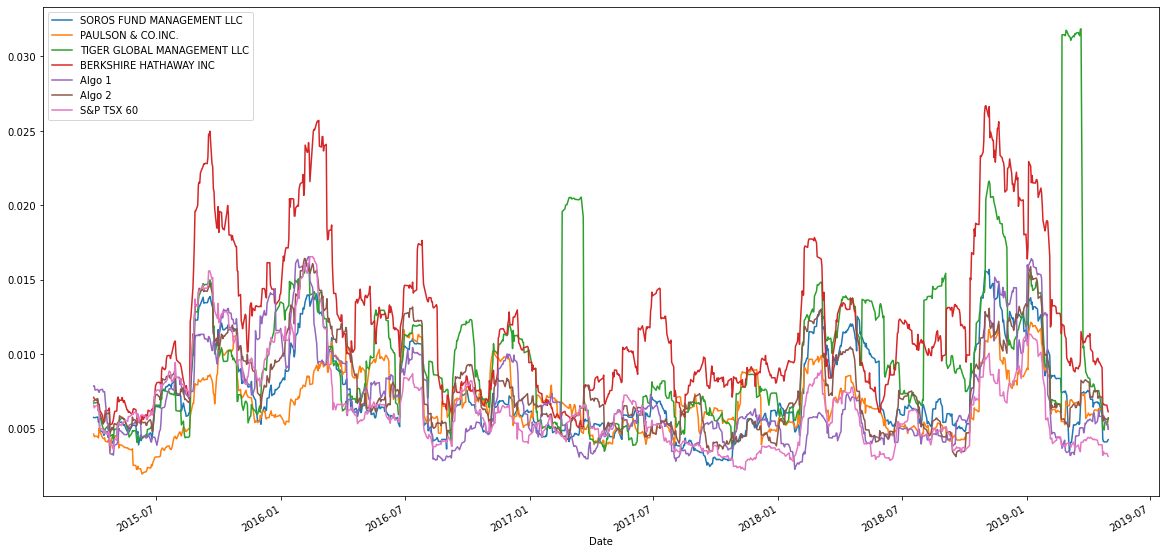

In [102]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

rolling_21 = combined_returns.rolling(window = 21).std()
rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [103]:
# Calculate the correlation
correlation = combined_returns.corr()
correlation
# Display correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


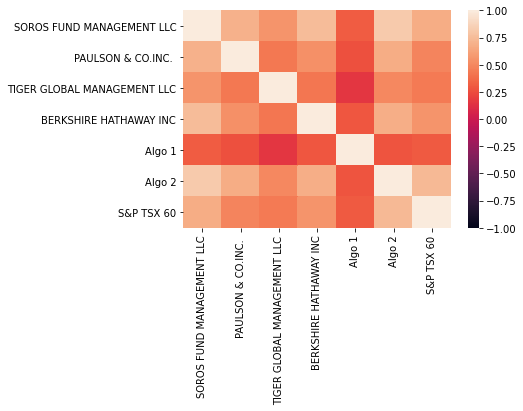

In [104]:
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

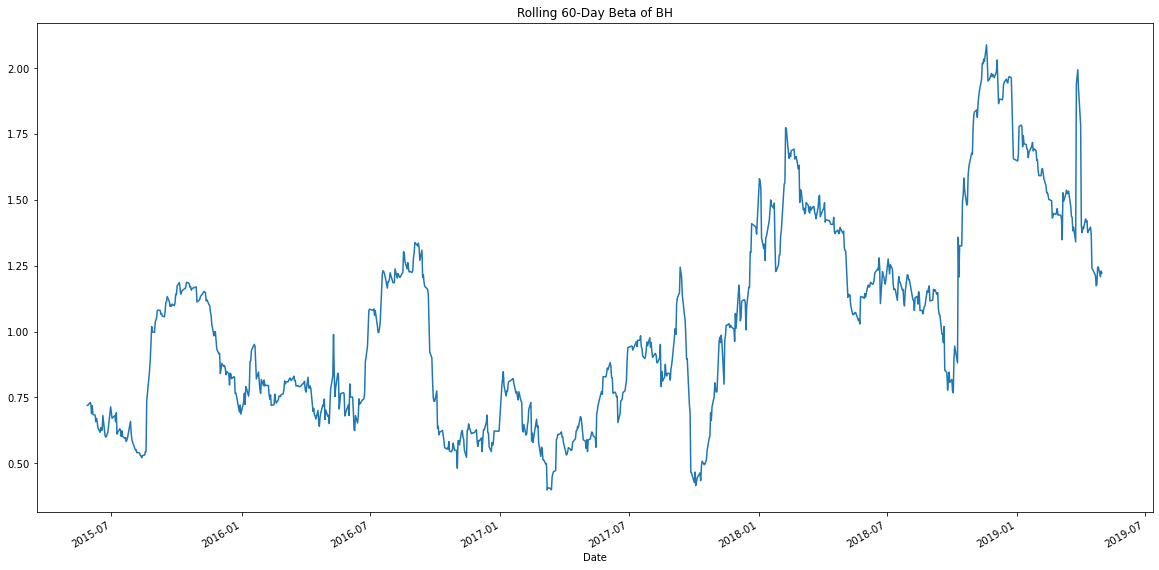

In [105]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P TSX
# Computing beta
# Plot beta trend

rolling_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns['S&P TSX 60'])
rolling_variance = combined_returns['S&P TSX 60'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

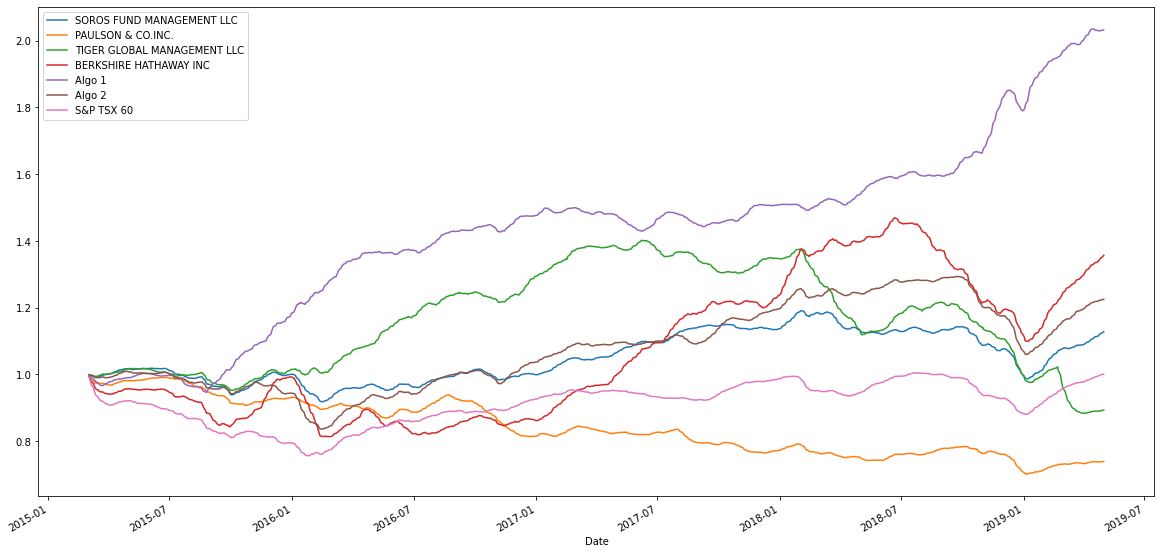

In [106]:
# Use `ewm` to calculate the rolling window
combined_returns_ewm = combined_returns.ewm(span = 21,adjust = False).mean()
(1+combined_returns_ewm).cumprod().plot(figsize = (20,10))

Algo 1 has the highest return in the 21 day window as shown in above chart.

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [107]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_returns.mean()*252/(combined_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

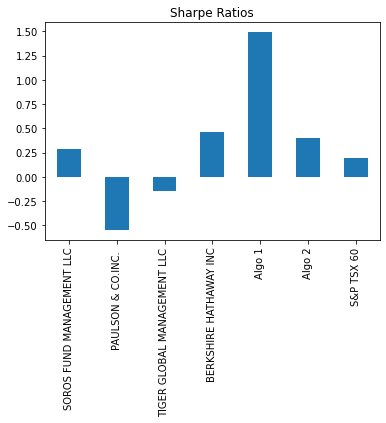

In [108]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 outperformed the market and the whales portfolios.

Algo 2 performed better than the market but it fell below Berkshire.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [109]:
# Reading data from 1st stock
amazon_csv= Path ("../pandas-homework/Resources/Amazon_history.csv")
amazon_history = pd.read_csv(amazon_csv, parse_dates = True, infer_datetime_format= True)
amazon_history.rename(columns = {"Close":"Amazon"}, inplace = True)
amazon_history['Date'] = pd.to_datetime(amazon_history['Date']).dt.date
amazon_history = amazon_history.set_index("Date")
amazon_history.head()


,Amazon
Date,
2018-01-02,1189.01
2018-01-03,1204.20
2018-01-04,1209.59
2018-01-05,1229.14
2018-01-08,1246.87


In [110]:
amazon_history.isnull().sum()

Amazon    0
dtype: int64

In [111]:
# Reading data from 2nd stock
apple_csv= Path ("../pandas-homework/Resources/Apple_history.csv")
apple_history = pd.read_csv(apple_csv, parse_dates = True, infer_datetime_format= True)
apple_history.rename(columns = {"Close":"Apple"}, inplace = True)
apple_history['Date'] = pd.to_datetime(apple_history['Date']).dt.date
apple_history = apple_history.set_index("Date")
apple_history.head()


,Apple
Date,
2018-01-02,43.07
2018-01-03,43.06
2018-01-04,43.26
2018-01-05,43.75
2018-01-08,43.59


In [112]:
apple_history.isnull().sum()

Apple    0
dtype: int64

In [113]:
# Reading data from 3rd stock
google_csv= Path ("../pandas-homework/Resources/Google_history.csv")
google_history = pd.read_csv(google_csv, parse_dates = True, infer_datetime_format= True)
google_history.rename(columns = {"Close":"Google"}, inplace = True)
google_history['Date'] = pd.to_datetime(google_history['Date']).dt.date
google_history = google_history.set_index("Date")
google_history.head()

,Google
Date,
2018-01-02,1065.00
2018-01-03,1082.48
2018-01-04,1086.40
2018-01-05,1102.23
2018-01-08,1106.94


In [114]:
google_history.isnull().sum()

Google    0
dtype: int64

In [115]:
# Reading data from 4th stock
tesla_csv= Path ("../pandas-homework/Resources/Tesla_history.csv")
tesla_history = pd.read_csv(tesla_csv, parse_dates = True, infer_datetime_format= True)
tesla_history.rename(columns = {"Close":"Tesla"}, inplace = True)
tesla_history['Date'] = pd.to_datetime(tesla_history['Date']).dt.date
tesla_history = tesla_history.set_index("Date")
tesla_history.head()

,Tesla
Date,
2018-01-02,64.11
2018-01-03,63.45
2018-01-04,62.92
2018-01-05,63.32
2018-01-08,67.28


In [116]:
tesla_history.isnull().sum()

Tesla    0
dtype: int64

In [117]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat((amazon_history, apple_history, google_history, tesla_history), axis = "columns", join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

,Amazon,Apple,Google,Tesla
Date,,,,
2018-01-02,1189.01,43.07,1065.00,64.11
2018-01-03,1204.20,43.06,1082.48,63.45
2018-01-04,1209.59,43.26,1086.40,62.92
2018-01-05,1229.14,43.75,1102.23,63.32
2018-01-08,1246.87,43.59,1106.94,67.28


In [118]:
# Calculate daily returns
daily_returns = my_stocks.pct_change()

# Drop NAs
daily_returns.dropna(inplace = True)

# Display sample data
daily_returns.head()

,Amazon,Apple,Google,Tesla
Date,,,,
2018-01-03,0.012775,-0.000232,0.016413,-0.010295
2018-01-04,0.004476,0.004645,0.003621,-0.008353
2018-01-05,0.016163,0.011327,0.014571,0.006357
2018-01-08,0.014425,-0.003657,0.004273,0.062539
2018-01-09,0.004676,-0.000229,-0.000614,-0.008026


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [119]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.dropna(inplace = True)

# Display sample data
portfolio_returns.head()


Date
2018-01-03    0.004665
2018-01-04    0.001097
2018-01-05    0.012104
2018-01-08    0.019395
2018-01-09   -0.001049
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [120]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat((portfolio_returns, combined_returns), axis = "columns", join = "inner")
all_returns.rename(columns = {0:"My Portfolio"}, inplace = True)
all_returns

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,0.004665,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.001097,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.012104,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.019395,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.001049,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,-0.011352,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.005702,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.008503,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [121]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(inplace=True)
all_returns

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,0.004665,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.001097,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.012104,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.019395,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.001049,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,-0.011352,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.005702,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.008503,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [122]:
# Calculate the annualized `std`
all_std = pd.DataFrame(all_returns.std()).rename(columns = {0:"std"}) 
all_std


,std
My Portfolio,0.017304
SOROS FUND MANAGEMENT LLC,0.009177
PAULSON & CO.INC.,0.007203
TIGER GLOBAL MANAGEMENT LLC,0.013848
BERKSHIRE HATHAWAY INC,0.014328
Algo 1,0.007561
Algo 2,0.008672
S&P TSX 60,0.006244


In [123]:
annualized_std = all_std*np.sqrt(252)
annualized_std

,std
My Portfolio,0.274689
SOROS FUND MANAGEMENT LLC,0.145675
PAULSON & CO.INC.,0.114343
TIGER GLOBAL MANAGEMENT LLC,0.219833
BERKSHIRE HATHAWAY INC,0.227445
Algo 1,0.120028
Algo 2,0.137664
S&P TSX 60,0.099121


My Portfolio is the riskiest out of all the other portfolios

### Calculate and plot rolling `std` with 21-day window

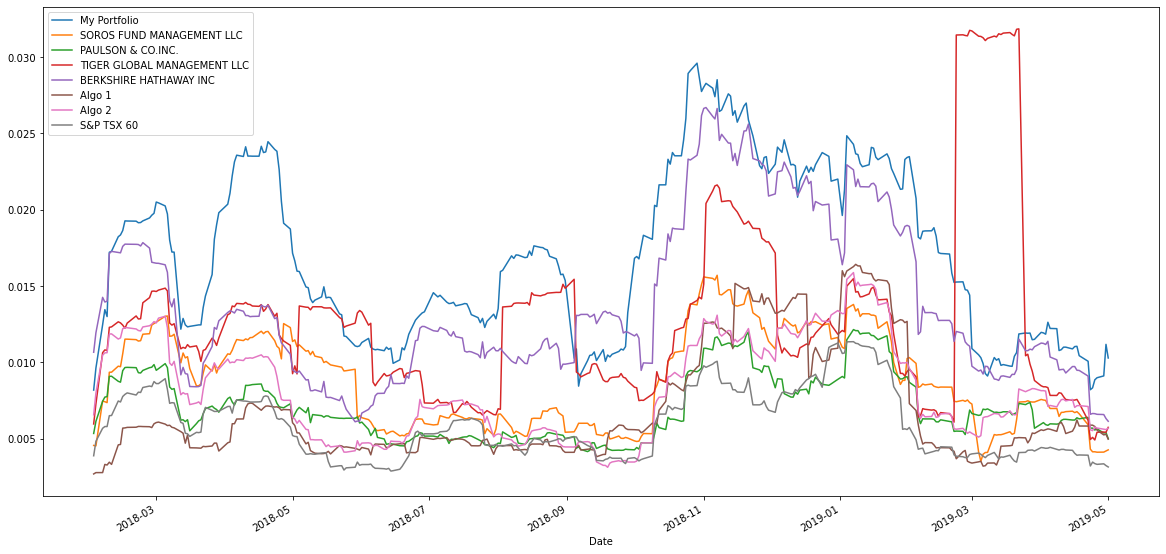

In [124]:
# Calculate rolling standard deviation
# Plot rolling standard deviation

all_rolling_21 = all_returns.rolling(window = 21).std()
all_rolling_21.plot(figsize = (20,10))


### Calculate and plot the correlation

In [125]:
# Calculate and plot the correlation
all_correlation = all_returns.corr()
all_correlation

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
My Portfolio,1.000000,0.660952,0.558656,0.387833,0.776454,0.238000,0.693678,0.536161
SOROS FUND MANAGEMENT LLC,0.660952,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681
PAULSON & CO.INC.,0.558656,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728
TIGER GLOBAL MANAGEMENT LLC,0.387833,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781
BERKSHIRE HATHAWAY INC,0.776454,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817
Algo 1,0.238000,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789
Algo 2,0.693678,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326
S&P TSX 60,0.536161,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000


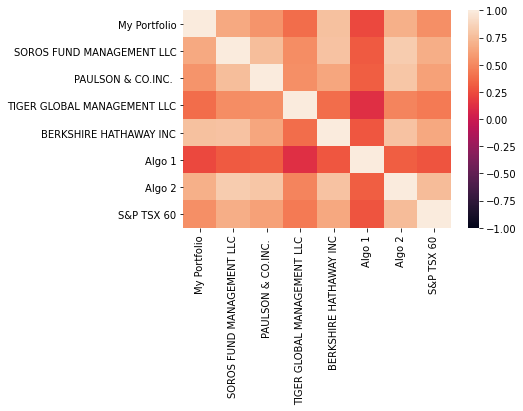

In [126]:
sns.heatmap(all_correlation, vmin=-1, vmax=1)

My portfolio is highly correlated to Berkshire as shown above.

### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

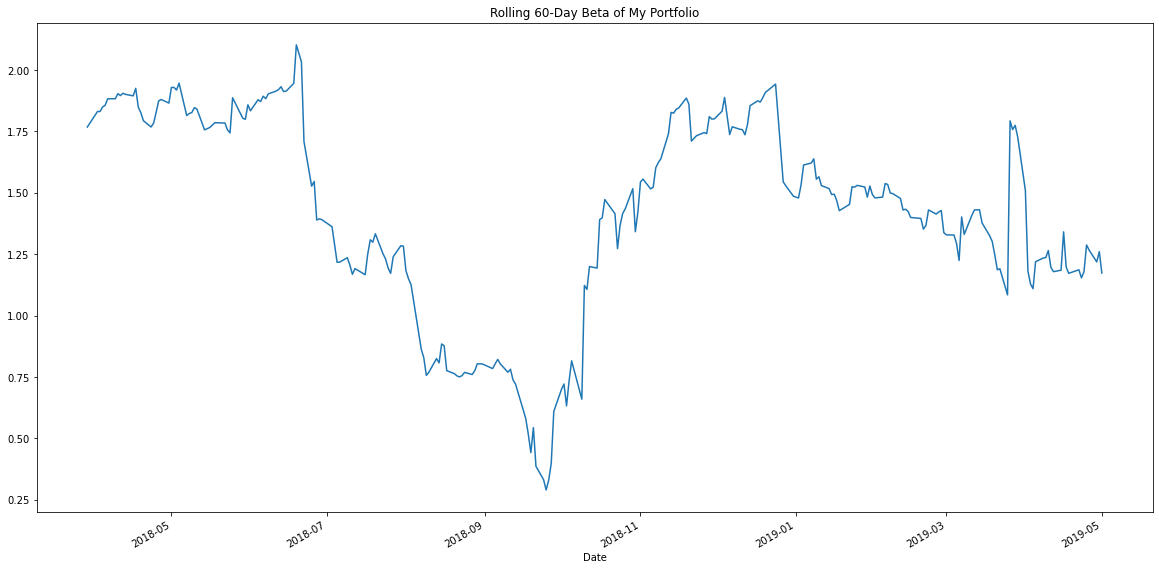

In [127]:
# Calculate and plot Beta
my_rolling_covariance = all_returns['My Portfolio'].rolling(window=60).cov(all_returns['S&P TSX 60'])
my_rolling_variance = all_returns['S&P TSX 60'].rolling(window=60).var()
my_rolling_beta = my_rolling_covariance / my_rolling_variance
my_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [128]:
# Calculate Annualzied Sharpe Ratios
all_sharpe_ratios = all_returns.mean()*252/(all_returns.std()*np.sqrt(252))
all_sharpe_ratios

My Portfolio                   0.378328
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
dtype: float64

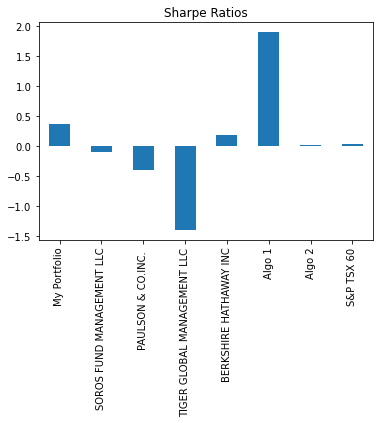

In [129]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### How does your portfolio do?

My portfolio performance was decent. It outperformed the Whales, Algo 2 and S&P TSX 60 but fell short in comparison to Algo 1